In [1]:
#importing basic liberaries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
#creating headers
headers = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']


In [5]:
#importing dataset and giving it header names
df = pd.read_csv("boston_house_prices.csv",names = headers)
new_df = df.drop([0,1],axis =0).reset_index(drop=True)
new_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


In [7]:
#checking for misiing values
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  B        506 non-null    object
 12  LSTAT    506 non-null    object
 13  PRICE    506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  B        506 non-null    object
 12  LSTAT    506 non-null    object
 13  PRICE    506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


In [11]:
#since the datatype of the columns is object we have to convert it to float before hopping into the model
new_df = new_df.astype("float")

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
#train test split
X = new_df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = new_df["PRICE"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [19]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

In [21]:

X_train = standard.fit_transform(X_train)

In [23]:
#only transforming the X_test to avoid overfitting
X_test = standard.transform(X_test)

In [25]:
#importing ridge and gridsearchCV for training the model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [27]:
#creating instance
ridge_regressor = Ridge()

In [29]:
# giving the parameters to GridSearchCV so that it can cross validate the data and give the best result possible
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(ridge_regressor,parameters,scoring ='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [31]:
#checking the best perameter
print(ridgecv.best_params_)

{'alpha': 10}


In [33]:
#pridiction
ridge_pred = ridgecv.predict(X_test)

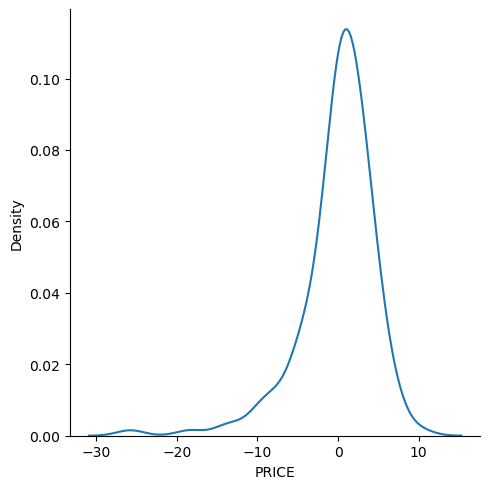

In [37]:
#ploting our prediction to see wheather it is good or not
import seaborn as sns
sns.displot(ridge_pred-y_test,kind ="kde")

In [43]:
#checking the score of our model
from sklearn.metrics import r2_score
score = r2_score(ridge_pred,y_test)
score

0.6468557055633654

lasso Regression

In [46]:
#same importing lasso from sklearn and creating its instance
from sklearn.linear_model import Lasso
lasso = Lasso()

In [50]:
# giving the parameters to GridSearchCV so that it can cross validate the data and give the best result possible
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv = GridSearchCV(lasso,parameters,scoring ='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [52]:
#providing our testing data for prediction
lasso_pred = lassocv.predict(X_test)

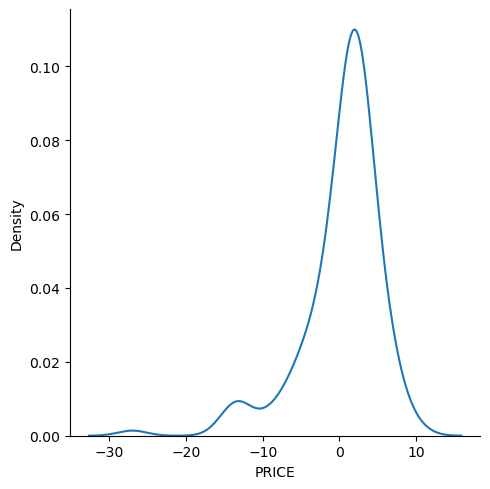

In [54]:
sns.displot(lasso_pred-y_test,kind ="kde")

In [56]:
#checking r2 score to know how well we have trained the dataset
score = r2_score(lasso_pred,y_test)
score

0.32577461229516547